# Dependencies

In [1]:
import pandas as pd
import json
import glob
import seaborn as sns

# load transcripts

In [3]:
file_list = glob.glob("/content/gdrive/MyDrive/DataScience/Masters/453_Final_Project/2021/*.json")

In [ ]:
len(file_list)

965

In [4]:

episode_transcript = {}
for file_path in file_list:
    episode_id = file_path[67:].replace('.json', '')
    data = json.load(open(file_path))
    
    complete_transcript = []
    
    for result in range(0, len(data['results'])-1):
    transcript_piece = data['results'][result]['alternatives'][0]['transcript']
    complete_transcript.append(transcript_piece)
    
    joined_transcript = ' '.join([w for w in complete_transcript])
    
    episode_transcript.setdefault('episode_filename_prefix', [])
    episode_transcript.setdefault('transcript', [])
    episode_transcript['episode_filename_prefix'].append(episode_id)
    episode_transcript['transcript'].append(joined_transcript)

In [5]:
episode_transcrip_df = pd.DataFrame(episode_transcript).set_index('episode_filename_prefix')

In [6]:
episode_transcrip_df.head(2)

,transcript
episode_filename_prefix,
006Jtc8ejGidNU66JMmE9o,"Hello, everyone, welcome back to astrology. No..."
006zxfhIhzUKBz0sPFuikZ,It's time for the fantasy points podcast broug...


# Get Meta Data 2

In [7]:

metadata = pd.read_csv('/content/gdrive/MyDrive/DataScience/Masters/453_Final_Project/2021/spotify-podcasts-2021-summarization-testset-meta.csv')
metadata.head(2)

,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration
0,spotify:show:63uxjpLRnQYcxpvHTMhExl,Bringing the Human back to Human Resources,People are at the center of every business--or...,Traci Rubin,en-US,https://anchor.fm/s/52984854/podcast/rss,spotify:episode:2qGUC8klqETUSpaqmjjzDZ,De-stigmatizing HR,"On this episode of ""Bringing the Human back to...",1884395
1,spotify:show:63uxjpLRnQYcxpvHTMhExl,Bringing the Human back to Human Resources,People are at the center of every business--or...,Traci Rubin,en-US,https://anchor.fm/s/52984854/podcast/rss,spotify:episode:3yBUhLxrYeRr0C7VkdYeIQ,The Emotional Impact of Layoffs,"In this week's episode, Traci talks about the ...",1682286


In [8]:
metadata['metadata_combined'] = ("podcast name: " + metadata['show_name'] + " " + 
                                  "podcast description: " + metadata['show_description'] + " " +
                                  "podcast publisher: " + metadata['publisher'] + " " +
                                  "podcast episode name: " + metadata['episode_name'] + " " +
                                  "podcast episode description: " + metadata['episode_description'] + " " +
                                  "minutes: " + str(round((metadata['duration']  / 60000),0)) + "minutes")

In [10]:
metadata_21 = metadata.copy().drop(columns=["show_name", "show_description",
                                     "publisher", "episode_name",
                                     "episode_description","duration",
                                     'show_uri', 'language', 'rss_link'])

metadata_21.head()

,episode_uri,metadata_combined
0,spotify:episode:2qGUC8klqETUSpaqmjjzDZ,podcast name: Bringing the Human back to Human...
1,spotify:episode:3yBUhLxrYeRr0C7VkdYeIQ,podcast name: Bringing the Human back to Human...
2,spotify:episode:01vE6mGTKhqHsmEFfqjJUw,podcast name: Bringing the Human back to Human...
3,spotify:episode:71w6Ak1Cw6wpyEx0fpFOm9,podcast name: JRE Clips podcast description: T...
4,spotify:episode:6mGrJgs1NPKOX9tGIDcvRJ,podcast name: Bold Alpha podcast description: ...


In [15]:
metadata_21['episode_filename_prefix'] = [episode.replace('spotify:episode:', '') for episode in metadata_21['episode_uri'].to_list()]
metadata['episode_filename_prefix'] = [episode.replace('spotify:episode:', '') for episode in metadata['episode_uri'].to_list()]

md_21 = metadata_21.set_index('episode_filename_prefix')
md = metadata.copy().set_index('episode_filename_prefix')
md_21.head(2)

,episode_uri,metadata_combined
episode_filename_prefix,,
2qGUC8klqETUSpaqmjjzDZ,spotify:episode:2qGUC8klqETUSpaqmjjzDZ,podcast name: Bringing the Human back to Human...
3yBUhLxrYeRr0C7VkdYeIQ,spotify:episode:3yBUhLxrYeRr0C7VkdYeIQ,podcast name: Bringing the Human back to Human...


In [17]:
md_21.drop(columns='episode_uri', inplace=True)
md.drop(columns='episode_uri', inplace=True)
md_21.head(2)

,metadata_combined
episode_filename_prefix,
2qGUC8klqETUSpaqmjjzDZ,podcast name: Bringing the Human back to Human...
3yBUhLxrYeRr0C7VkdYeIQ,podcast name: Bringing the Human back to Human...


In [18]:
md_epi_tran = md_21.join(episode_transcrip_df, how='inner')
uncombined = md.join(episode_transcrip_df, how='inner')
md_epi_tran.head(2)

,metadata_combined,transcript
episode_filename_prefix,,
2qGUC8klqETUSpaqmjjzDZ,podcast name: Bringing the Human back to Human...,Welcome to the bringing the human Back To Huma...
3yBUhLxrYeRr0C7VkdYeIQ,podcast name: Bringing the Human back to Human...,Welcome to the bringing the human Back To Huma...


In [19]:
md_epi_tran['complete_episode_info'] = md_epi_tran['metadata_combined'] + md_epi_tran['transcript']

In [20]:
uncombined.head(2)

,show_uri,show_name,show_description,publisher,language,rss_link,episode_name,episode_description,duration,metadata_combined,transcript
episode_filename_prefix,,,,,,,,,,,
2qGUC8klqETUSpaqmjjzDZ,spotify:show:63uxjpLRnQYcxpvHTMhExl,Bringing the Human back to Human Resources,People are at the center of every business--or...,Traci Rubin,en-US,https://anchor.fm/s/52984854/podcast/rss,De-stigmatizing HR,"On this episode of ""Bringing the Human back to...",1884395,podcast name: Bringing the Human back to Human...,Welcome to the bringing the human Back To Huma...
3yBUhLxrYeRr0C7VkdYeIQ,spotify:show:63uxjpLRnQYcxpvHTMhExl,Bringing the Human back to Human Resources,People are at the center of every business--or...,Traci Rubin,en-US,https://anchor.fm/s/52984854/podcast/rss,The Emotional Impact of Layoffs,"In this week's episode, Traci talks about the ...",1682286,podcast name: Bringing the Human back to Human...,Welcome to the bringing the human Back To Huma...


In [21]:
md_epi_tran.head(2)

,metadata_combined,transcript,complete_episode_info
episode_filename_prefix,,,
2qGUC8klqETUSpaqmjjzDZ,podcast name: Bringing the Human back to Human...,Welcome to the bringing the human Back To Huma...,podcast name: Bringing the Human back to Human...
3yBUhLxrYeRr0C7VkdYeIQ,podcast name: Bringing the Human back to Human...,Welcome to the bringing the human Back To Huma...,podcast name: Bringing the Human back to Human...


In [22]:
md_epi_tran.reset_index(inplace=True)
md_epi_tran.drop(columns=['metadata_combined', 'transcript', 'episode_filename_prefix'], inplace=True)
md_epi_tran.head(2)

,complete_episode_info
0,podcast name: Bringing the Human back to Human...
1,podcast name: Bringing the Human back to Human...


In [ ]:
# md_epi_tran.to_csv('/content/gdrive/MyDrive/DataScience/Masters/453_Final_Project/md_transcript_together.csv')

In [23]:
md_epi_tran_20 = md_epi_tran.iloc[:20, :].copy()
uncombined_20 = uncombined.iloc[:20, :].copy()
md_epi_tran_20

,complete_episode_info
0,podcast name: Bringing the Human back to Human...
1,podcast name: Bringing the Human back to Human...
2,podcast name: Bringing the Human back to Human...
3,podcast name: Bold Alpha podcast description: ...
4,podcast name: The Powerline Podcast with Micha...
5,podcast name: The Pedestal podcast descriptio...
6,podcast name: Indelicates podcast description:...
7,podcast name: BOOTHCAST podcast description: I...
8,podcast name: The Diverse Mentality Podcast po...
9,podcast name: Friends For The Future podcast ...


In [ ]:
md_epi_tran_20.to_csv('/content/gdrive/MyDrive/DataScience/Masters/453_Final_Project/md_epi_tran_20.csv')

In [ ]:
episode_list = md_epi_tran_20['complete_episode_info'].to_list()

with open(r'/content/gdrive/MyDrive/DataScience/Masters/453_Final_Project/episode_list.txt', 'w') as fp:
    for item in episode_list:
        # write each item on a new line
        fp.write(item)
    print('Done')

Done


# Explore transcript and metadata

In [ ]:
md_epi_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   podcast_name_title           937 non-null    object 
 1   podcast_description          937 non-null    object 
 2   podcast_publisher            937 non-null    object 
 3   podcast_episode_name_title   937 non-null    object 
 4   podcast_episode_description  937 non-null    object 
 5   podcast_episode_duration     937 non-null    float64
 6   podcast_epsiode_transcript   937 non-null    object 
dtypes: float64(1), object(6)
memory usage: 51.4+ KB


In [24]:
uncombined_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2qGUC8klqETUSpaqmjjzDZ to 7aYqoH2GlWfX7rLTrbLhhC
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   show_uri             20 non-null     object
 1   show_name            20 non-null     object
 2   show_description     20 non-null     object
 3   publisher            20 non-null     object
 4   language             20 non-null     object
 5   rss_link             20 non-null     object
 6   episode_name         20 non-null     object
 7   episode_description  20 non-null     object
 8   duration             20 non-null     int64 
 9   metadata_combined    20 non-null     object
 10  transcript           20 non-null     object
dtypes: int64(1), object(10)
memory usage: 2.4+ KB


In [ ]:
md_epi_tran['podcast_publisher'].value_counts()

Dr. Eric Berg                           6
Traci Rubin                             3
Watson Estates                          3
Everyday Positivity                     3
Deconstructor of Fun                    3
                                       ..
Jesse Nowlin and Steve Larsen           1
Midgard Musings                         1
OCRWC                                   1
Josh, Collin and Ryan Dewitt            1
What’s da cheese? With Sean and Valo    1
Name: podcast_publisher, Length: 876, dtype: int64

In [26]:
uncombined_20['publisher'].value_counts()

Traci Rubin                             3
Alpha Dave                              1
Jeff Perla                              1
North American Spine Society            1
John & Tony, Tony & John                1
J.D. Barker, J. Thorn, Zach Bohannon    1
The Geek Buddies                        1
Joseph Mendoza                          1
Mary & Emily                            1
The Bring The Juice Colts Podcast       1
Kerry Ryan                              1
Clara P. Baum                           1
Quake                                   1
Michael Booth                           1
indelicates                             1
Kanye And Nick                          1
Michael Doyle                           1
In All Kinds Of Weather Forecast        1
Name: publisher, dtype: int64

In [54]:
uncombined_20['length'].sort_values()

episode_filename_prefix
7psoq8Y3hNucDOpkvMdgUy     1.0
2SwLOKYPQV8fgEF4Bz7yyE     5.0
4vAXbtqUuUdBMlwpMG6Vmc    22.0
2sPrnOpqC5rI8iRsg4ukqg    22.0
3yBUhLxrYeRr0C7VkdYeIQ    28.0
0h7gxRjWha8AxCvfFGgCCz    28.0
01vE6mGTKhqHsmEFfqjJUw    30.0
1AoLSLAF2lez8AB64dcwCX    30.0
2qGUC8klqETUSpaqmjjzDZ    31.0
6TyJDjxJI5e0RRFarn1npg    40.0
7pd7U8QIHkcKDdyRsTMc7X    45.0
5xMABmLfFotg0qXp7ZFV8F    46.0
7f9ybSZXkQ2DstreOYnMQy    48.0
3NogVdgT0vAqssiaFGjeok    48.0
6mGrJgs1NPKOX9tGIDcvRJ    51.0
4nZLQJzqVb0tNX9kWXPcBn    54.0
7aYqoH2GlWfX7rLTrbLhhC    75.0
387HAZatqgSiW9vYoLxC6R    79.0
4tsymFnj6cOkImzeJy09Gl    79.0
27H9p8NlTsipbHy3tYv67i    87.0
Name: length, dtype: float64

<Axes: xlabel='length', ylabel='Count'>

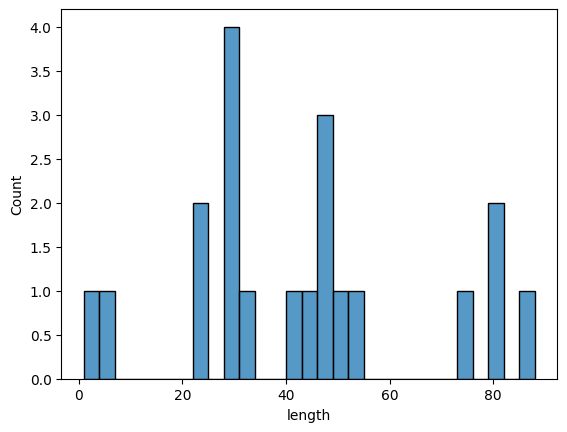

In [53]:
sns.histplot(uncombined_20['length'], bins=10, binwidth=3)

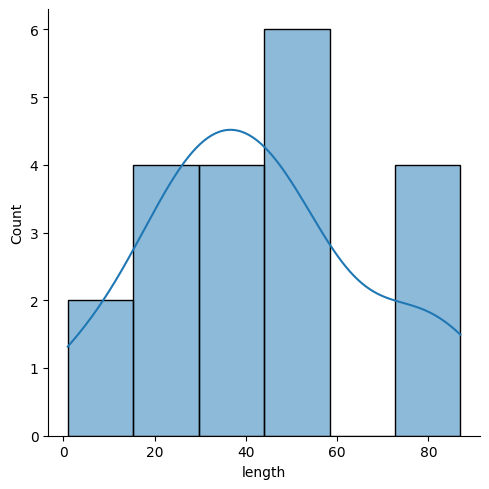

In [59]:
sns.displot(uncombined_20['length'], kde=True)

In [ ]:
sns.histplot(md_epi_tran['podcast_episode_duration'])

In [ ]:
# standard table
# md_epi_tran.to_csv('/content/gdrive/MyDrive/DataScience/Masters/453_Final_Project/episode_md2021.csv')